In [2]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, r2_score, f1_score, mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.frozen import FrozenEstimator


data = pd.DataFrame({
    'Study_Hours':[1,2,3,4,5,6],
    'Quiz_Score': [59, 95, 81, 92, 73, 76],
    'Study_Group': [0,1,2,0,1,2],
    'Extracurriculars':[1,2,3,1,2,3],
    'Pass/Fail': ['Fail', 'Pass', 'Pass', 'Pass', 'Fail', 'Pass']

})






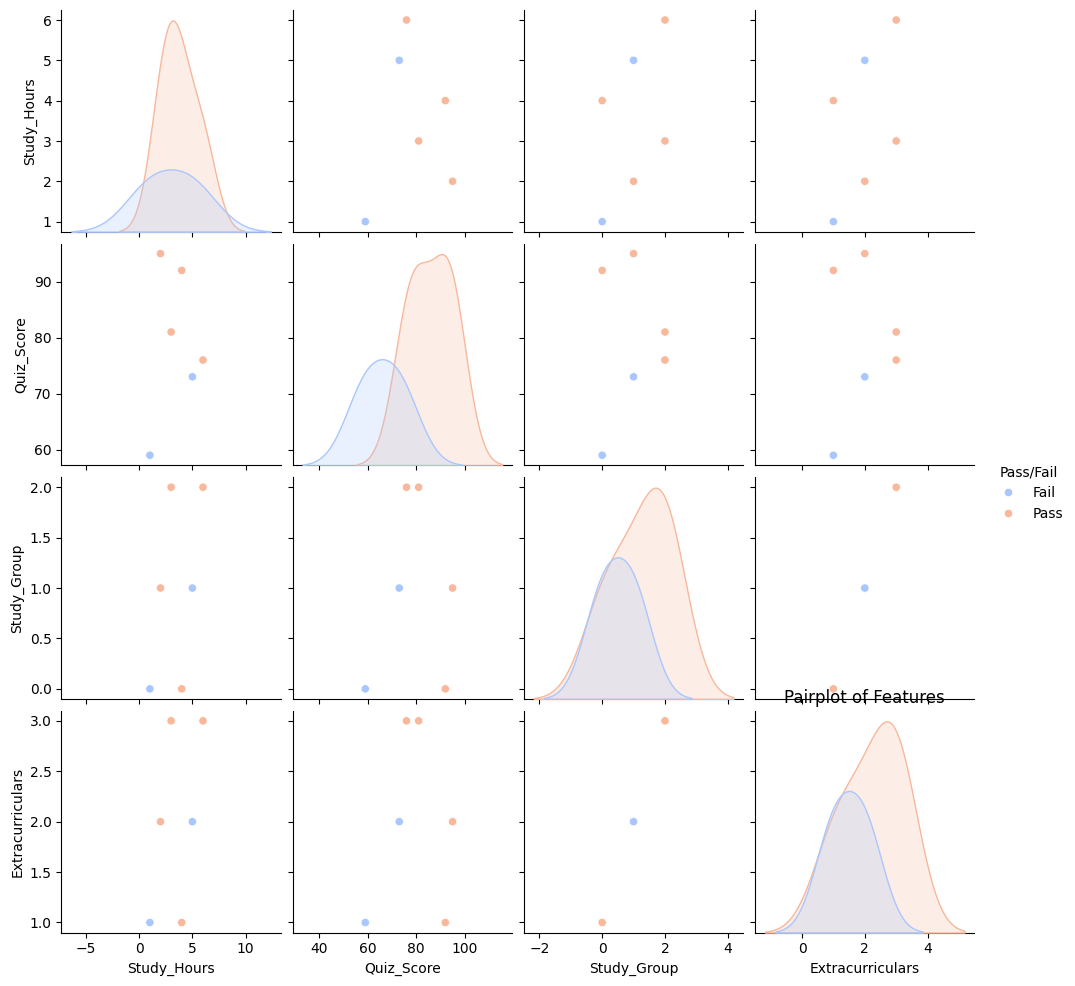

In [3]:
sns.pairplot(data, hue='Pass/Fail', palette='coolwarm')
plt.title('Pairplot of Features')
plt.show()


In [4]:
quiz_scores = data['Quiz_Score']
mean_score = np.mean(quiz_scores)
median_score = np.median(quiz_scores)
mode_score = data['Quiz_Score'].mode()[0]

In [5]:
print(f'Updated Mean Quiz Score{mean_score}')
print(f'Updated Median Quiz Score{median_score}')
print(f"Updated Mode Quiz Score:{mode_score}")

Updated Mean Quiz Score79.33333333333333
Updated Median Quiz Score78.5
Updated Mode Quiz Score:59


In [6]:
X_class = data[['Study_Hours', 'Study_Group', 'Extracurriculars']]
y_class = data['Pass/Fail'].map({'Fail': 0, 'Pass': 1})
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(X_class, y_class, test_size=0.3, random_state=42)


In [7]:
X_reg = data[['Study_Hours']]
y_reg = data['Quiz_Score']
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)


In [8]:
#Decision Tree
tree = DecisionTreeClassifier(random_state=42)
tree.fit(X_train_class, y_train_class)
y_test_pred_class = tree.predict(X_test_class)
print(f"Decision Tree Accuracy{accuracy_score(y_test_class, y_test_pred_class):.2f}")
print(f"Decision Tree Classification Report", classification_report(y_test_class, y_test_pred_class))
print(f"Confusion Matrix", confusion_matrix(y_test_class, y_test_pred_class))

Decision Tree Accuracy0.00
Decision Tree Classification Report               precision    recall  f1-score   support

           0       0.00      0.00      0.00       1.0
           1       0.00      0.00      0.00       1.0

    accuracy                           0.00       2.0
   macro avg       0.00      0.00      0.00       2.0
weighted avg       0.00      0.00      0.00       2.0

Confusion Matrix [[0 1]
 [1 0]]


In [9]:
#Random Forest Classifier
forest = RandomForestClassifier(n_estimators=100, random_state=42)
forest.fit(X_train_class, y_train_class)
y_test_pred_class = forest.predict(X_test_class)
print(f"Random Forest Accuracy{accuracy_score(y_test_class, y_test_pred_class):.2f}")
print(f"Random Forest Classification Report", classification_report(y_test_class, y_test_pred_class))
print(f"Confusion Matrix", confusion_matrix(y_test_class, y_test_pred_class))

Random Forest Accuracy0.50
Random Forest Classification Report               precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.50      1.00      0.67         1

    accuracy                           0.50         2
   macro avg       0.25      0.50      0.33         2
weighted avg       0.25      0.50      0.33         2

Confusion Matrix [[0 1]
 [0 1]]


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [10]:
# KNN
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_class, y_train_class)
y_test_pred_class = knn.predict(X_test_class)
print(f"KNeighbors Accuracy{accuracy_score(y_test_class, y_test_pred_class):.2f}")


KNeighbors Accuracy0.50


In [11]:
underfit_tree = DecisionTreeClassifier(max_depth=1, random_state=42)
underfit_tree.fit(X_train_class, y_train_class)
y_test_pred_underfit = underfit_tree.predict(X_test_class)
print(f"Underfitting Decision Tree{accuracy_score(y_test_class, y_test_pred_underfit):.2f}")

Underfitting Decision Tree0.50


In [12]:
overfit_tree = DecisionTreeClassifier(max_depth=10, random_state=42)
overfit_tree.fit(X_train_class, y_train_class)
y_test_pred_overfit = overfit_tree.predict(X_test_class)
print(f"Overfitting Decision Tree{accuracy_score(y_test_class, y_test_pred_overfit):.2f}")

Overfitting Decision Tree0.00


Text(0.5, 1.0, 'Original Data')

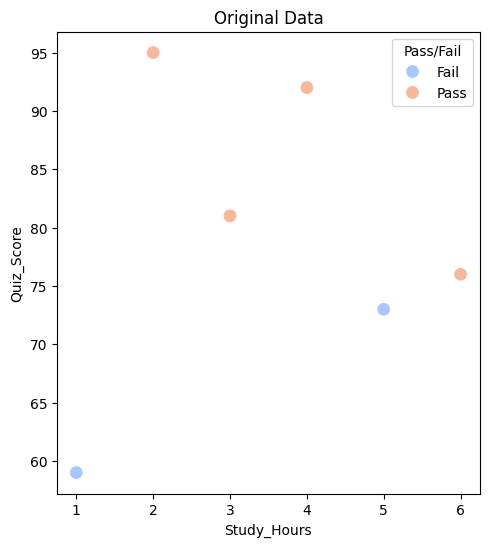

In [13]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.scatterplot(data=data, x='Study_Hours', y='Quiz_Score', hue='Pass/Fail', palette='coolwarm', s=100)
plt.title('Original Data')


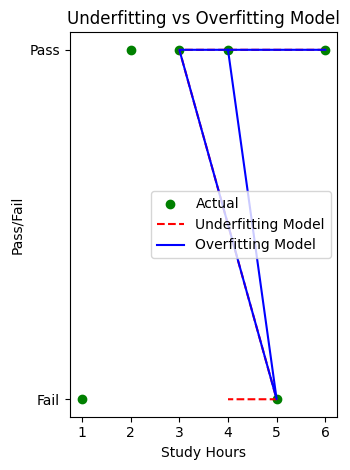

In [14]:
plt.subplot(1,2,2)
plt.scatter(X_class['Study_Hours'], y_class.map({0: 'Fail', 1: 'Pass'}), color='green', label='Actual')
plt.plot(X_train_class['Study_Hours'], underfit_tree.predict(X_train_class), color='red', label='Underfitting Model', linestyle='--')
plt.plot(X_train_class['Study_Hours'], overfit_tree.predict(X_train_class), color='blue', label='Overfitting Model', linestyle='-')
plt.xlabel('Study Hours')
plt.ylabel('Pass/Fail')
plt.legend()
plt.title('Underfitting vs Overfitting Model')



plt.tight_layout()
plt.show()